<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1204covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from glob import glob
from ast import literal_eval
from sklearn import linear_model
import sklearn.preprocessing as pre 

In [ ]:
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59554,NaN,NaN,International,2020-11-23,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59555,NaN,NaN,International,2020-11-24,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59556,NaN,NaN,International,2020-11-25,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59557,NaN,NaN,International,2020-11-26,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59559 entries, 0 to 59558
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            59226 non-null  object 
 1   continent                           58893 non-null  object 
 2   location                            59559 non-null  object 
 3   date                                59559 non-null  object 
 4   total_cases                         55908 non-null  float64
 5   new_cases                           58609 non-null  float64
 6   new_cases_smoothed                  57795 non-null  float64
 7   total_deaths                        46312 non-null  float64
 8   new_deaths                          58609 non-null  float64
 9   new_deaths_smoothed                 57795 non-null  float64
 10  total_cases_per_million             55611 non-null  float64
 11  new_cases_per_million               58545

In [ ]:
df['date'] = df['date'].astype(np.datetime64)

In [ ]:
df_hot = df.dropna()
df_hot

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [ ]:
cond = df['iso_code'] == 'KOR'
kor = df[cond]
kor

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30172,KOR,Asia,South Korea,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30173,KOR,Asia,South Korea,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30174,KOR,Asia,South Korea,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30175,KOR,Asia,South Korea,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30176,KOR,Asia,South Korea,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30500,KOR,Asia,South Korea,2020-11-23,31004.0,271.0,319.286,509.0,4.0,2.143,604.730,5.286,6.228,9.928,0.078,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2865680.0,10819.0,55.895,0.211,15186.0,0.296,47.562,0.021,people tested,44.44,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30501,KOR,Asia,South Korea,2020-11-24,31353.0,349.0,336.429,510.0,1.0,2.286,611.537,6.807,6.562,9.947,0.020,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2888630.0,22950.0,56.342,0.448,16297.0,0.318,48.441,0.021,people tested,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30502,KOR,Asia,South Korea,2020-11-25,31735.0,382.0,346.286,513.0,3.0,2.429,618.988,7.451,6.754,10.006,0.059,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910567.0,21937.0,56.770,0.428,16985.0,0.331,49.049,0.020,people tested,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903
30503,KOR,Asia,South Korea,2020-11-26,32318.0,583.0,380.571,515.0,2.0,2.429,630.359,11.371,7.423,10.045,0.039,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2932685.0,22118.0,57.202,0.431,17767.0,0.347,46.685,0.021,people tested,NaN,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.903


In [ ]:
kor.index = kor['date']
kor = kor.drop('date', axis=1)
kor

In [ ]:
kor['2020-02']

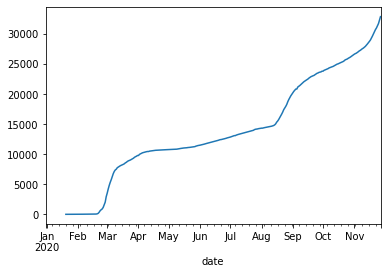

In [ ]:
kor['total_cases'].plot()

In [ ]:
img = plt.figure()
img.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot(country, col):
  cond = df['iso_code'] == country
  count = df[cond]
  count[col].plot()

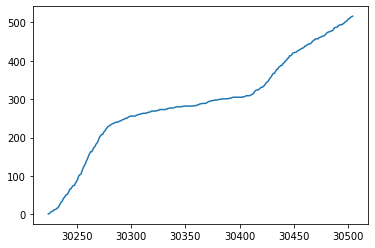

In [ ]:
plot('KOR', 'total_deaths')

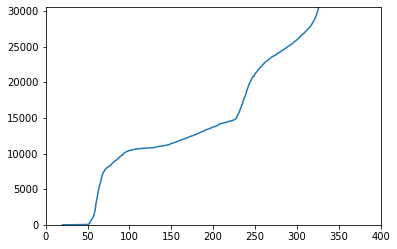

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set(xlim=[0., 400.],ylim=[0., 30500.])

x = np.arange(len(kor))
y = kor['total_cases']
 
ax.plot(x, y)
plt.show()